In [181]:
# Dependencies
import requests 
import json
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from pathlib import Path


In [182]:
#pulling stored files to potential use later
%store -r select_states_population_change_df 
%store -r total_population_df
%store -r state_rental_df
%store -r per_rental_df
%store -r sel_states_pop_ych_df

In [183]:
#looking at the names of the columns
sel_states_pop_ych_df.columns

Index(['State', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', 'Popestimate 10-Year Change 2020(%)'],
      dtype='object')

In [184]:
#Selecting the columns we want to use later
states_pop_change = sel_states_pop_ych_df[['State', 'Popestimate 10-Year Change 2020(%)']]
states_pop_change

,State,Popestimate 10-Year Change 2020(%)
0,District of Columbia,1.177659
1,Utah,1.170953
2,Texas,1.163176
49,Illinois,0.980296
50,West Virginia,0.962531


In [185]:
#Fixing Labels
states_pop_change['State'] = states_pop_change['State'].replace({'West Virginia': 'Virginia'})
states_pop_change

/var/folders/qy/tzsk1z093rxg3c6fl6r124p40000gn/T/ipykernel_83977/2781824905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_pop_change['State'] = states_pop_change['State'].replace({'West Virginia': 'Virginia'})


,State,Popestimate 10-Year Change 2020(%)
0,District of Columbia,1.177659
1,Utah,1.170953
2,Texas,1.163176
49,Illinois,0.980296
50,Virginia,0.962531


In [186]:
#Looking at dataframes to see the name of the columns
total_population_df.columns

Index(['State', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020'],
      dtype='object')

In [187]:
#Creating a new state rental vacancy dataframe
state_rental_df2 = state_rental_df[['States', '2010', '2011', '2012', '2013','2014','2015','2016','2017',
                                                  '2018','2019','2020']]

state_rental_df2

Year,States,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,District of Columbia,9.0,8.4,7.8,7.7,6.5,5.4,5.8,7.1,7.9,6.0,8.2
1,Virginia,10.5,9.9,9.5,7.3,7.4,6.6,7.0,6.7,6.5,7.0,6.5
2,Utah,7.2,6.4,7.7,6.7,8.6,5.1,5.7,6.2,5.4,3.8,5.3
3,Illinois,11.0,10.2,9.5,9.6,9.2,7.5,7.6,8.0,7.4,7.5,7.9
4,Texas,13.3,12.3,10.4,10.1,9.5,9.6,9.4,9.8,8.9,9.5,8.6


In [189]:
per_rental_df

Year,States,Yearly Rental Vacancy Change 2011(%),Yearly Rental Vacancy Change 2012(%),Yearly Rental Vacancy Change 2013(%),Yearly Rental Vacancy Change 2014(%),Yearly Rental Vacancy Change 2015(%),Yearly Rental Vacancy Change 2016(%),Yearly Rental Vacancy Change 2017(%),Yearly Rental Vacancy Change 2018(%),Yearly Rental Vacancy Change 2019(%),Yearly Rental Vacancy Change 2020(%)
0,District of Columbia,-0.6,-0.6,-0.1,-1.2,-1.1,0.4,1.3,0.8,-1.9,2.2
1,Virginia,-0.6,-0.4,-2.2,0.1,-0.8,0.4,-0.3,-0.2,0.5,-0.5
2,Utah,-0.8,1.3,-1.0,1.9,-3.5,0.6,0.5,-0.8,-1.6,1.5
3,Illinois,-0.8,-0.7,0.1,-0.4,-1.7,0.1,0.4,-0.6,0.1,0.4
4,Texas,-1.0,-1.9,-0.3,-0.6,0.1,-0.2,0.4,-0.9,0.6,-0.9


In [190]:
#renaming the column 'states'
vacancy_pop_change_df = per_rental_df.rename(columns = {"States": "State"})


vacancy_pop_change_df

Year,State,Yearly Rental Vacancy Change 2011(%),Yearly Rental Vacancy Change 2012(%),Yearly Rental Vacancy Change 2013(%),Yearly Rental Vacancy Change 2014(%),Yearly Rental Vacancy Change 2015(%),Yearly Rental Vacancy Change 2016(%),Yearly Rental Vacancy Change 2017(%),Yearly Rental Vacancy Change 2018(%),Yearly Rental Vacancy Change 2019(%),Yearly Rental Vacancy Change 2020(%)
0,District of Columbia,-0.6,-0.6,-0.1,-1.2,-1.1,0.4,1.3,0.8,-1.9,2.2
1,Virginia,-0.6,-0.4,-2.2,0.1,-0.8,0.4,-0.3,-0.2,0.5,-0.5
2,Utah,-0.8,1.3,-1.0,1.9,-3.5,0.6,0.5,-0.8,-1.6,1.5
3,Illinois,-0.8,-0.7,0.1,-0.4,-1.7,0.1,0.4,-0.6,0.1,0.4
4,Texas,-1.0,-1.9,-0.3,-0.6,0.1,-0.2,0.4,-0.9,0.6,-0.9


In [191]:
#adding another column for the change across the 10 year period
vacancy_pop_change_df["Rental Vacancy 10-Year Change (%)"] = vacancy_pop_change_df["Yearly Rental Vacancy Change 2011(%)"] / \
                                        vacancy_pop_change_df["Yearly Rental Vacancy Change 2020(%)"]

vacancy_pop_change_df

Year,State,Yearly Rental Vacancy Change 2011(%),Yearly Rental Vacancy Change 2012(%),Yearly Rental Vacancy Change 2013(%),Yearly Rental Vacancy Change 2014(%),Yearly Rental Vacancy Change 2015(%),Yearly Rental Vacancy Change 2016(%),Yearly Rental Vacancy Change 2017(%),Yearly Rental Vacancy Change 2018(%),Yearly Rental Vacancy Change 2019(%),Yearly Rental Vacancy Change 2020(%),Rental Vacancy 10-Year Change (%)
0,District of Columbia,-0.6,-0.6,-0.1,-1.2,-1.1,0.4,1.3,0.8,-1.9,2.2,-0.272727
1,Virginia,-0.6,-0.4,-2.2,0.1,-0.8,0.4,-0.3,-0.2,0.5,-0.5,1.200000
2,Utah,-0.8,1.3,-1.0,1.9,-3.5,0.6,0.5,-0.8,-1.6,1.5,-0.533333
3,Illinois,-0.8,-0.7,0.1,-0.4,-1.7,0.1,0.4,-0.6,0.1,0.4,-2.000000
4,Texas,-1.0,-1.9,-0.3,-0.6,0.1,-0.2,0.4,-0.9,0.6,-0.9,1.111111


In [192]:
#new dataframe
vacancy_10_change_df = vacancy_pop_change_df[['State', 'Rental Vacancy 10-Year Change (%)']]
vacancy_10_change_df

Year,State,Rental Vacancy 10-Year Change (%)
0,District of Columbia,-0.272727
1,Virginia,1.200000
2,Utah,-0.533333
3,Illinois,-2.000000
4,Texas,1.111111


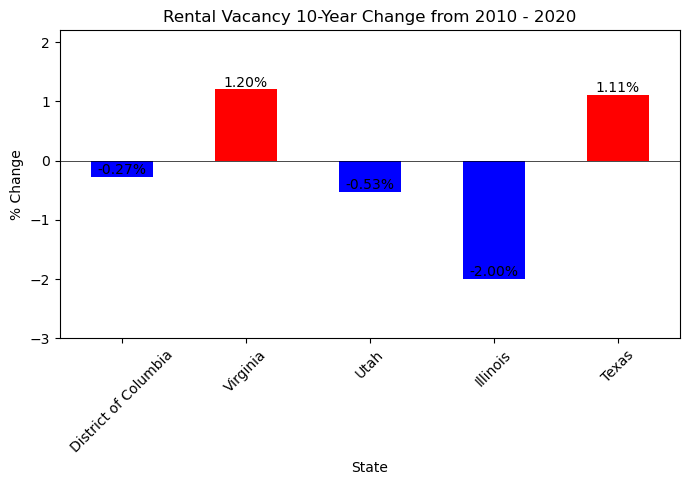

In [193]:
ax = vacancy_10_change_df.plot.bar(x="State", y='Rental Vacancy 10-Year Change (%)', color=['blue', 'red', 'blue', 'blue', 'red'], legend=False, figsize=(8, 4))

# Add data labels to the bars
for p in ax.patches:
    label_text = f"{p.get_height():.2f}%"  # Format to two decimal places
    ax.annotate(label_text, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Set a title for the plot
plt.title('Rental Vacancy 10-Year Change from 2010 - 2020')

# Set labels for x and y axes
plt.xlabel('State')
plt.xticks(rotation=45)
plt.ylabel('% Change')

# Add a horizontal line at y=0
plt.axhline(0, color='black', linewidth=0.5)

# Add space above the bars
ax.set_ylim(-3, max(vacancy_10_change_df['Rental Vacancy 10-Year Change (%)']) + 1)

# Save the plot as a png image
plt.savefig("rentalvacancygraphs/Fig3.png")

plt.show()

In [194]:
#merging the population change and the rental change
rental_pop_df = pd.merge(vacancy_10_change_df, states_pop_change, on='State')

rental_pop_df

,State,Rental Vacancy 10-Year Change (%),Popestimate 10-Year Change 2020(%)
0,District of Columbia,-0.272727,1.177659
1,Virginia,1.200000,0.962531
2,Utah,-0.533333,1.170953
3,Illinois,-2.000000,0.980296
4,Texas,1.111111,1.163176


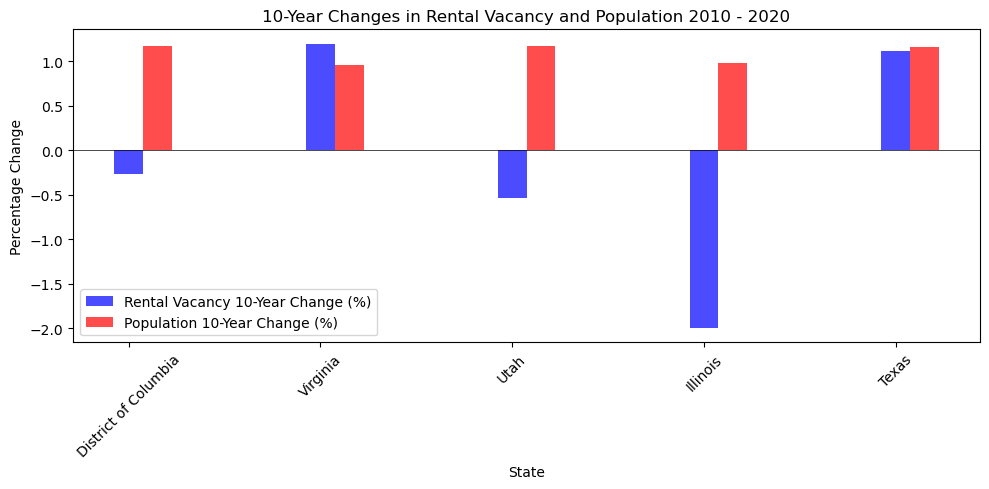

In [195]:
#setting the parameters for the bar chart
plt.figure(figsize=(10, 5))
bar_width = 0.15
index = range(len(rental_pop_df))

#plotting the bar chart
bar1 = plt.bar(rental_pop_df['State'], rental_pop_df['Rental Vacancy 10-Year Change (%)'], bar_width, label='Rental Vacancy 10-Year Change (%)', alpha=0.7, color='b')
#shifting the bars so they do not overlap 
bar2 = plt.bar([i+bar_width for i in index], rental_pop_df['Popestimate 10-Year Change 2020(%)'], bar_width, label='Population 10-Year Change (%)', alpha=0.7, color='r')

#adding title and labels
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('State')
plt.ylabel('Percentage Change')
plt.title('10-Year Changes in Rental Vacancy and Population 2010 - 2020')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()

# Save the plot as a png image
plt.savefig("rentalvacancygraphs/Fig4.png")
plt.show()